In [52]:
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [3]:
filesName = os.listdir('bbc')

text = []
labels = []


for name in filesName:
    for doc in os.listdir('bbc/' + name):
        try:
            f = open('bbc/' + name + '/' +  doc , 'r')
            text.append(f.read())
            labels.append(name)
            f.close()
        except:
            print('Wrong')
            f.close()


df = pd.DataFrame(columns = ['text' , 'label'])
df['text'] = text
df['label'] = labels


df

Wrong


,text,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2219,BT program to beat dialler scams\n\nBT is intr...,tech
2220,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2221,Be careful how you code\n\nA new European dire...,tech
2222,US cyber security chief resigns\n\nThe man mak...,tech


text     0
label    0
dtype: int64


Number of classes: 5
Class frequency:
business         510
sport            510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64


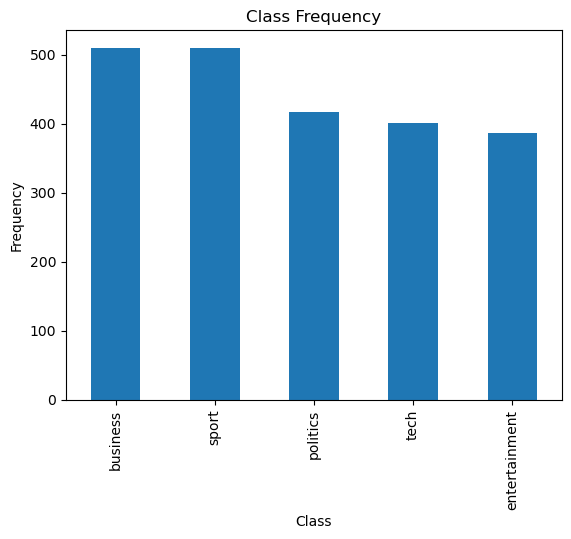

In [4]:
# Chack if there is a null data in df
print(df.isnull().sum())

# Drop the rows that have a null data
df.dropna(inplace=True)

print('')
print('')

# Determine the number of classes
num_classes = len(set(df['label']))
print(f'Number of classes: {num_classes}')

# Count the frequency of each class
class_counts = df['label'].value_counts()
print(f'Class frequency:')
print(class_counts)

# Plot the class frequency
class_counts.plot(kind='bar', title='Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
def preprocess_text(text, stem=True, lemmatize=True):
    # Convert the text to lower case
    text = str(text)
    text = text.lower()
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Replace symbols with empty spaces
    text = re.sub(r'[^\w\s]', ' ', text)
        
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove non-English words and characters
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lemmatize the tokens
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    text = " ".join(tokens)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Create a Porter stemmer
stemmer = PorterStemmer()

# Create a WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

df['clean_text'] = df['text'].apply(preprocess_text)

df

,text,label,clean_text
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,dollar gain greenspan speech dollar hit highes...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,high fuel price hit ba profit british airway b...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,pernod takeover talk lift domecq share uk drin...
...,...,...,...
2219,BT program to beat dialler scams\n\nBT is intr...,tech,bt program beat dialler scam bt introducing tw...
2220,Spam e-mails tempt net shoppers\n\nComputer us...,tech,spam e mail tempt net shopper computer user ac...
2221,Be careful how you code\n\nA new European dire...,tech,careful code new european directive could put ...
2222,US cyber security chief resigns\n\nThe man mak...,tech,u cyber security chief resigns man making sure...


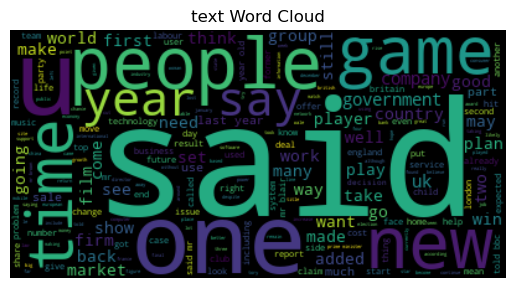

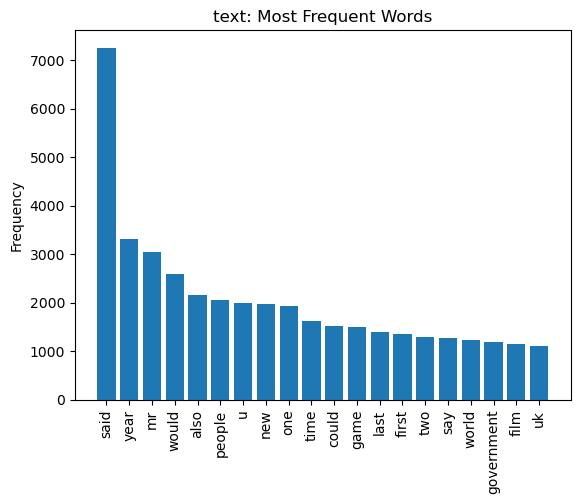

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join the cleaned text data into a single string
text_string = ' '.join([''.join(word) for word in df['clean_text']])

# Create a word cloud
wordcloud = WordCloud().generate(text_string)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('text Word Cloud')
plt.show()

# Count the frequency of each word
word_counts = {}
for word in text_string.split():
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Plot the top 20 most frequent words
top_words = [word for word, count in sorted_word_counts[:20]]
top_counts = [count for word, count in sorted_word_counts[:20]]

plt.bar(top_words, top_counts, align='center')
plt.title('text: Most Frequent Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [77]:
LE = LabelEncoder()
Labels = LE.fit_transform(df['label'])
Labels = to_categorical(Labels)

label_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'].astype(str), Labels, test_size=0.2, random_state=42)


vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=10000,
 output_mode='int',
 output_sequence_length=100)

vectorize_layer.adapt(df['clean_text'])

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=128))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5 , activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), validation_data=(X_test,y_test),epochs=10, batch_size=32)


Epoch 1/10
56/56 [==============================] - 3s 37ms/step - loss: 1.4158 - accuracy: 0.5059 - val_loss: 0.8484 - val_accuracy: 0.8517
Epoch 2/10
56/56 [==============================] - 2s 36ms/step - loss: 0.1702 - accuracy: 0.9910 - val_loss: 0.1988 - val_accuracy: 0.9483
Epoch 3/10
56/56 [==============================] - 2s 34ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9506
Epoch 4/10
56/56 [==============================] - 2s 34ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1569 - val_accuracy: 0.9506
Epoch 5/10
56/56 [==============================] - 2s 34ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9506
Epoch 6/10
56/56 [==============================] - 2s 34ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9483
Epoch 7/10
56/56 [==============================] - 2s 35ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9506
Epoch 8/10
56

In [92]:
model_prediction = []
true = []

predict = model.predict(X_test)

for i in range(len(predict)):
    true.append(y_test[i].argmax())
    model_prediction.append(predict[i].argmax())

from sklearn.metrics import accuracy_score , precision_score , recall_score
print(accuracy_score(true , model_prediction))
print(precision_score(true , model_prediction , average = 'weighted'))
print(recall_score(true , model_prediction , average = 'weighted'))

14/14 [==============================] - 0s 7ms/step
0.950561797752809
0.9510036706280701
0.950561797752809


<Axes: >

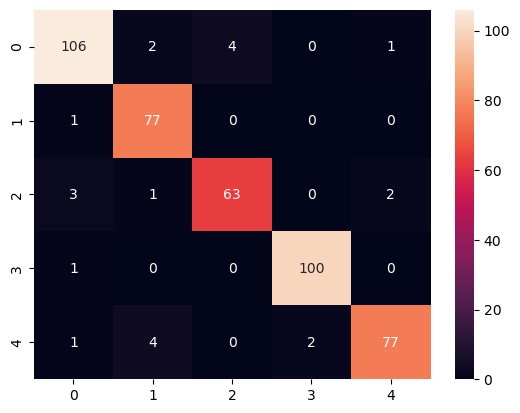

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn

con = confusion_matrix(true , model_prediction)
seaborn.heatmap(con , annot=True ,fmt='.0f')

In [101]:
tf.saved_model.save(model, 'model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
